<a href="https://colab.research.google.com/github/kaiwangx/Medical-Image-Analysis/blob/master/yolov3/training/notebook/prepare_dataset%26train.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Tutorial

In [ ]:
cd /content/drive/My Drive/Model_Stacking/mxnet-yolov3

/content/drive/My Drive/Model_Stacking/mxnet-yolov3


In [ ]:
!pip install --upgrade mxnet gluoncv

     |████████████████████████████████| 55.0MB 62kB/s 
     |████████████████████████████████| 819kB 62.0MB/s 
  Found existing installation: graphviz 0.10.1
    Uninstalling graphviz-0.10.1:
      Successfully uninstalled graphviz-0.10.1


(576, 768, 3)


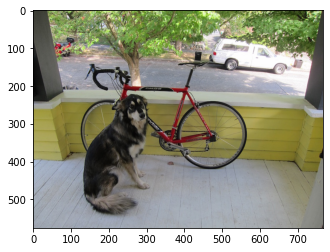

In [ ]:
import os, zipfile
from gluoncv import utils
import mxnet as mx
import numpy as np
from matplotlib import pyplot as plt

im_fname = 'dog.jpg'
img = mx.image.imread(im_fname)
ax = utils.viz.plot_image(img)
print(img.shape)
plt.show()

[[130 220 320 530]
 [115 120 580 420]
 [480  80 700 170]]
[0 1 2]
['dog', 'bike', 'car']


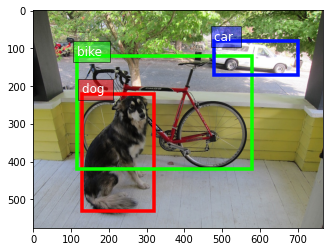

In [ ]:
dog_label = [130, 220, 320, 530]
bike_label = [115, 120, 580, 420]
car_label = [480, 80, 700, 170]
all_boxes = np.array([dog_label, bike_label, car_label])
all_ids = np.array([0, 1, 2])
class_names = ['dog', 'bike', 'car']

print(all_boxes)
print(all_ids)
print(class_names)

# see how it looks by rendering the boxes into image
ax = utils.viz.plot_bbox(img, all_boxes, labels=all_ids, class_names=class_names)
plt.show()

In [ ]:
def write_line(img_path, im_shape, boxes, ids, idx):
    h, w, c = im_shape
    # for header, we use minimal length 2, plus width and height
    # with A: 4, B: 5, C: width, D: height
    A = 4
    B = 5
    C = w
    D = h
    # concat id and bboxes
    labels = np.hstack((ids.reshape(-1, 1), boxes)).astype('float')
    # normalized bboxes (recommanded)
    labels[:, (1, 3)] /= float(w)
    labels[:, (2, 4)] /= float(h)
    # flatten
    labels = labels.flatten().tolist()
    str_idx = [str(idx)]
    str_header = [str(x) for x in [A, B, C, D]]
    str_labels = [str(x) for x in labels]
    str_path = [img_path]
    line = '\t'.join(str_idx + str_header + str_labels + str_path) + '\n'
    return line

In [ ]:
with open('val.lst', 'w') as fw:
    for i in range(4):
        line = write_line('dog.jpg', img.shape, all_boxes, all_ids, i)
        print(line)
        fw.write(line)

0	4	5	768	576	0.0	0.16927083333333334	0.3819444444444444	0.4166666666666667	0.9201388888888888	1.0	0.14973958333333334	0.20833333333333334	0.7552083333333334	0.7291666666666666	2.0	0.625	0.1388888888888889	0.9114583333333334	0.2951388888888889	dog.jpg

1	4	5	768	576	0.0	0.16927083333333334	0.3819444444444444	0.4166666666666667	0.9201388888888888	1.0	0.14973958333333334	0.20833333333333334	0.7552083333333334	0.7291666666666666	2.0	0.625	0.1388888888888889	0.9114583333333334	0.2951388888888889	dog.jpg

2	4	5	768	576	0.0	0.16927083333333334	0.3819444444444444	0.4166666666666667	0.9201388888888888	1.0	0.14973958333333334	0.20833333333333334	0.7552083333333334	0.7291666666666666	2.0	0.625	0.1388888888888889	0.9114583333333334	0.2951388888888889	dog.jpg

3	4	5	768	576	0.0	0.16927083333333334	0.3819444444444444	0.4166666666666667	0.9201388888888888	1.0	0.14973958333333334	0.20833333333333334	0.7552083333333334	0.7291666666666666	2.0	0.625	0.1388888888888889	0.9114583333333334	0.29513888888888

In [ ]:
from gluoncv.data import LstDetection
lst_dataset = LstDetection('val.lst', root=os.path.expanduser('.'))
print('length:', len(lst_dataset))
first_img = lst_dataset[0][0]
print('image shape:', first_img.shape)
print('Label example:')
print(lst_dataset[0][1])
print("GluonCV swaps bounding boxes to columns 0-3 by default")

length: 4
image shape: (576, 768, 3)
Label example:
[[130. 220. 320. 530.   0.]
 [115. 120. 580. 420.   1.]
 [480.  80. 700. 170.   2.]]
GluonCV swaps bounding boxes to columns 0-3 by default


In [ ]:
import sys
import subprocess
im2rec = utils.download('https://raw.githubusercontent.com/apache/incubator-mxnet/' +
                        '6843914f642c8343aaa9a09db803b6af6f5d94a2/tools/im2rec.py', 'im2rec.py')
# In this tutorial we skip generating in subprocess but instead download a prepared val.rec
# subprocess.check_output([sys.executable, 'im2rec.py', 'val', '.', '--no-shuffle', '--pass-through', '--pack-label'])
utils.download('https://gist.github.com/zhreshold/599999eab290e951fcfb26cdd59885e2/raw/0d945eeea2a71ba7bd3e39d463f39921acb786d1/val.rec', 'val.rec')
utils.download('https://gist.github.com/zhreshold/599999eab290e951fcfb26cdd59885e2/raw/0d945eeea2a71ba7bd3e39d463f39921acb786d1/val.idx', 'val.idx')

100%|██████████| 4/4 [00:00<00:00, 714.81KB/s]


641KB [00:00, 6569.92KB/s]             


1KB [00:00, 158.85KB/s]


'val.idx'

In [ ]:
from gluoncv.data import RecordFileDetection
record_dataset = RecordFileDetection('val.rec', coord_normalized=True)

# we expect same results from LstDetection
print('length:', len(record_dataset))
first_img = record_dataset[0][0]
print('image shape:', first_img.shape)
print('Label example:')
print(record_dataset[0][1])

length: 4
image shape: (576, 768, 3)
Label example:
[[130. 220. 320. 530.   0.]
 [115. 120. 580. 420.   1.]
 [480.  80. 700. 170.   2.]]


### Read CSV file

In [ ]:
!pip install --upgrade mxnet gluoncv

     |████████████████████████████████| 68.7MB 48kB/s 
     |████████████████████████████████| 757kB 60.8MB/s 
  Found existing installation: graphviz 0.10.1
    Uninstalling graphviz-0.10.1:
      Successfully uninstalled graphviz-0.10.1


In [ ]:
cd /content/drive/My Drive/DataSet14_20200429/raw_patient_based

/content/drive/My Drive/DataSet14_20200429/raw_patient_based


In [ ]:
import csv
with open('1_15.csv') as csv_file:
    csv_reader = csv.reader(csv_file, delimiter=',')
    line_count = 0
    for row in csv_reader:
        if line_count == 0:
            print(f'Column names are {", ".join(row)}')
            line_count += 1
        else:
            print(row[9], row[10], row[11], row[12])
            line_count += 1
    print(f'Processed {line_count} lines.')

FileNotFoundError: ignored

In [ ]:
import csv

with open('1_15.csv', mode='r') as csv_file:
    csv_reader = csv.DictReader(csv_file)
    line_count = 0
    for row in csv_reader:
        if line_count == 0:
            # print(f'Column names are {", ".join(row)}')
            line_count += 1
        print(row["BX"], row["BY"], row["Width"], row["Height"])
        line_count += 1
    print(f'Processed {line_count} lines.')

272 408 44 46
Processed 2 lines.


In [ ]:
# import os
# from os import path

# for dirpath, dirnames, files in os.walk('.'):
#     print(f'Found directory: {dirpath}')
#     for file_name in sorted(files):
#         # if file_name.lower().endswith('.tif'):
#         #     print(file_name)
#         #     label = file_name.replace('.tif', '.cvs')
#         #     if path.exists(label):
#         #         print("Label", label)

Found directory: .
Found directory: ./Patient 45


TypeError: ignored

### Read labels

In [ ]:
import os
def getListOfFiles(dirName):
    # create a list of file and sub directories 
    # names in the given directory 
    listOfFile = os.listdir(dirName)
    allFiles = list()
    # Iterate over all the entries
    for entry in listOfFile:
        # Create full path
        fullPath = os.path.join(dirName, entry)
        # If entry is a directory then get the list of files in this directory 
        if os.path.isdir(fullPath):
            allFiles = allFiles + getListOfFiles(fullPath)
        else:
            allFiles.append(fullPath)
                
    return allFiles

In [ ]:
dirName = 'Training/Bleeding/';
# Get the list of all files in directory tree at given path
listOfFiles = getListOfFiles(dirName)
print(listOfFiles)

['Training/Bleeding/.DS_Store', 'Training/Bleeding/Patient 1012/1012_11_49.jpg', 'Training/Bleeding/Patient 1012/1012_15_49.jpg', 'Training/Bleeding/Patient 1012/1012_17_49.jpg', 'Training/Bleeding/Patient 1012/1012_13_49.jpg', 'Training/Bleeding/Patient 1012/1012_9_49.jpg', 'Training/Bleeding/Patient 1012/1012_7_49.jpg', 'Training/Bleeding/Patient 1012/1012_19_49.jpg', 'Training/Bleeding/Patient 1012/1012_25_49.jpg', 'Training/Bleeding/Patient 1012/1012_28_49.jpg', 'Training/Bleeding/Patient 1012/1012_23_49.jpg', 'Training/Bleeding/Patient 1012/1012_21_49.jpg', 'Training/Bleeding/Patient 1012/1012_31_49.jpg', 'Training/Bleeding/Patient 1012/1012_46_49.csv', 'Training/Bleeding/Patient 1012/1012_34_49.jpg', 'Training/Bleeding/Patient 1012/1012_37_49.jpg', 'Training/Bleeding/Patient 1012/1012_40_49.jpg', 'Training/Bleeding/Patient 1012/1012_43_49.jpg', 'Training/Bleeding/Patient 1012/1012_46_49.tif', 'Training/Bleeding/Patient 1012/1012_46_49.jpg', 'Training/Bleeding/Patient 1012/1012_49

In [ ]:
# import csv

# bboxes = []
# with open('46_3.csv', mode='r') as csv_file:
#     csv_reader = csv.DictReader(csv_file)
#     line_count = 0
#     for row in csv_reader:
#         bboxes.append([row["BX"], row["BY"], row["Width"], row["Height"]])

# print(bboxes)

In [ ]:
import csv
def getBbox(dirName):
    bboxes = []
    with open(dirName, mode='r') as csv_file:
        csv_reader = csv.DictReader(csv_file)
        line_count = 0
        for row in csv_reader:
            bboxes.append([int(row["BX"]), int(row["BY"]), int(row["BX"]) + 
                           int(row["Width"]), int(row["BY"]) + int(row["Height"])])
    return bboxes

In [ ]:
# for files in listOfFiles:
#     if files.endswith('.tif'):
#         print(files)
#         label = files.replace('.tif', '.csv')
#         if label in listOfFiles:
#             bbox = getBbox(label)       
#             print(bbox[0])

In [ ]:
import numpy as np
import os, zipfile
from gluoncv import utils
import mxnet as mx
from matplotlib import pyplot as plt

In [ ]:
for files in sorted(listOfFiles):
    if files.endswith('.tif'):
        print(files)
        im_fname = files
        img = mx.image.imread(im_fname)
        label = files.replace('.tif', '.csv')
        if label in listOfFiles:
            all_boxes = np.array(getBbox(label))
            all_ids = []
            class_names = []
            for x in range(len(all_boxes)):
                all_ids.append(0)
                class_names.append("bleeding")
            class_names = np.array(class_names)
            all_ids = np.array(all_ids)
            # print(all_boxes)
            # print(all_ids)
            # print(class_names)
            ax = utils.viz.plot_bbox(img, all_boxes, labels=all_ids, class_names=class_names)
            plt.show()

In [ ]:
import numpy as np
import os, zipfile
from gluoncv import utils
import mxnet as mx
from matplotlib import pyplot as plt

for files in sorted(listOfFiles):
    if files.endswith('.tif'):
        print(files)
        label = files.replace('.tif', '.csv')
        if label in listOfFiles:
            all_boxes = np.array(getBbox(label))
            all_ids = []
            class_names = []
            for x in range(len(all_boxes)):
                all_ids.append(0)
                class_names.append("bleeding")
            class_names = np.array(class_names)
            all_ids = np.array(all_ids)

### Create label for our dataset

In [3]:
cd /content/drive/My Drive/DataSet14_20200429/raw_patient_based

/content/drive/My Drive/DataSet14_20200429/raw_patient_based


In [ ]:
cd /content/drive/My Drive/DataSet14_20200429/raw_patient_based/Testing/Bleeding/Patient 1016/1016_12_29.tif

[Errno 2] No such file or directory: '/content/drive/My Drive/DataSet14_20200429/raw_patient_based/Testing/Bleeding/Patient'
/content/drive/My Drive/DataSet14_20200429/raw_patient_based


(800, 800, 3)


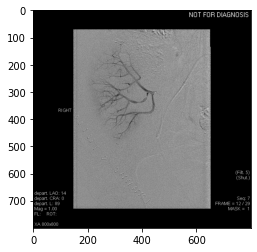

In [ ]:
import os, zipfile
from gluoncv import utils
import mxnet as mx
import numpy as np
from matplotlib import pyplot as plt

im_fname = 'Testing/Bleeding/Patient 1016/1016_12_29.tif'
img = mx.image.imread(im_fname)
ax = utils.viz.plot_image(img)
print(img.shape)
plt.show()

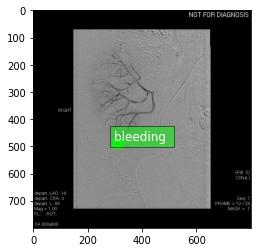

In [ ]:
bleeding_label = [297, 479, 322, 504]
all_boxes = np.array([bleeding_label])
all_ids = np.array([0])
class_names = ['bleeding']

# see how it looks by rendering the boxes into image
ax = utils.viz.plot_bbox(img, all_boxes, labels=all_ids, class_names=class_names, colors={0: (0, 1, 0)})
plt.show()

In [1]:
import os
def getListOfFiles(dirName):
    # create a list of file and sub directories 
    # names in the given directory 
    listOfFile = os.listdir(dirName)
    allFiles = list()
    # Iterate over all the entries
    for entry in listOfFile:
        # Create full path
        fullPath = os.path.join(dirName, entry)
        # If entry is a directory then get the list of files in this directory 
        if os.path.isdir(fullPath):
            allFiles = allFiles + getListOfFiles(fullPath)
        else:
            allFiles.append(fullPath)
                
    return allFiles

In [ ]:
def write_line(img_path, im_shape, boxes, ids, idx):
    h, w, c = im_shape
    # for header, we use minimal length 2, plus width and height
    # with A: 4, B: 5, C: width, D: height
    A = 4
    B = 5
    C = w
    D = h
    # concat id and bboxes
    labels = np.hstack((ids.reshape(-1, 1), boxes)).astype('float')
    # normalized bboxes (recommanded)
    labels[:, (1, 3)] /= float(w)
    labels[:, (2, 4)] /= float(h)
    # flatten
    labels = labels.flatten().tolist()
    str_idx = [str(idx)]
    str_header = [str(x) for x in [A, B, C, D]]
    str_labels = [str(x) for x in labels]
    str_path = [img_path]
    line = '\t'.join(str_idx + str_header + str_labels + str_path) + '\n'
    return line

In [ ]:
# i = 0
# with open('val.lst', 'w') as fw:
#     for files in sorted(listOfFiles):
#         if files.endswith('.tif'):
#             im_fname = files
#             img = mx.image.imread(im_fname)
#             label = files.replace('.tif', '.csv')
#             if label in listOfFiles:
#                 all_boxes = np.array(getBbox(label))
#                 all_ids = []
#                 for x in range(len(all_boxes)):
#                     all_ids.append(0)
#                 all_ids = np.array(all_ids)
#                 line = write_line(files, img.shape, all_boxes, all_ids, i)
#             else:
#                 line = write_line_nobbox(files, img.shape, i)
#             print(line)
#             fw.write(line)
#             i+=1

0	4	5	1000	1000	Bleeding/Patient 1/1_11.tif

1	4	5	1000	1000	Bleeding/Patient 1/1_13.tif

2	4	5	1000	1000	0.0	0.272	0.408	0.316	0.454	Bleeding/Patient 1/1_15.tif

3	4	5	1000	1000	0.0	0.272	0.414	0.312	0.45	Bleeding/Patient 1/1_17.tif

4	4	5	1000	1000	0.0	0.244	0.372	0.314	0.45	Bleeding/Patient 1/1_21.tif

5	4	5	1000	1000	0.0	0.254	0.396	0.312	0.448	Bleeding/Patient 1/1_23.tif

6	4	5	1000	1000	0.0	0.25	0.388	0.314	0.45	Bleeding/Patient 1/1_25.tif

7	4	5	1000	1000	0.0	0.25	0.348	0.312	0.454	Bleeding/Patient 1/1_27.tif

8	4	5	1000	1000	0.0	0.25	0.342	0.314	0.45	Bleeding/Patient 1/1_29.tif

9	4	5	1000	1000	0.0	0.256	0.35	0.308	0.45	Bleeding/Patient 1/1_31.tif

10	4	5	1000	1000	0.0	0.254	0.34	0.316	0.452	Bleeding/Patient 1/1_33.tif

11	4	5	1000	1000	0.0	0.248	0.328	0.314	0.454	Bleeding/Patient 1/1_35.tif

12	4	5	1000	1000	0.0	0.246	0.344	0.322	0.452	Bleeding/Patient 1/1_37.tif

13	4	5	1000	1000	Bleeding/Patient 1/1_5.tif

14	4	5	1000	1000	Bleeding/Patient 1/1_7.tif

15	4	5	1000	1000	Bleedin

In [ ]:
# create filename.txt
i = 0
dirName = 'Training/Bleeding/';
# Get the list of all files in directory tree at given path
listOfFiles = getListOfFiles(dirName)
with open('trainfile_name.txt', 'w') as fw:
    for files in sorted(listOfFiles):
        if files.endswith('.tif'):
            print(files)
            fw.write(files+'\n')
            i+=1

Training/Bleeding/Patient 1/1_11.tif
Training/Bleeding/Patient 1/1_13.tif
Training/Bleeding/Patient 1/1_15.tif
Training/Bleeding/Patient 1/1_17.tif
Training/Bleeding/Patient 1/1_21.tif
Training/Bleeding/Patient 1/1_23.tif
Training/Bleeding/Patient 1/1_25.tif
Training/Bleeding/Patient 1/1_27.tif
Training/Bleeding/Patient 1/1_29.tif
Training/Bleeding/Patient 1/1_31.tif
Training/Bleeding/Patient 1/1_33.tif
Training/Bleeding/Patient 1/1_35.tif
Training/Bleeding/Patient 1/1_37.tif
Training/Bleeding/Patient 1/1_5.tif
Training/Bleeding/Patient 1/1_7.tif
Training/Bleeding/Patient 1/1_9.tif
Training/Bleeding/Patient 11/11_10.tif
Training/Bleeding/Patient 11/11_11.tif
Training/Bleeding/Patient 11/11_12.tif
Training/Bleeding/Patient 11/11_13.tif
Training/Bleeding/Patient 11/11_14.tif
Training/Bleeding/Patient 11/11_15.tif
Training/Bleeding/Patient 11/11_16.tif
Training/Bleeding/Patient 11/11_17.tif
Training/Bleeding/Patient 11/11_18.tif
Training/Bleeding/Patient 11/11_20.tif
Training/Bleeding/Pat

In [4]:
# create filename.txt
i = 0
dirName = 'Training/validation/';
# Get the list of all files in directory tree at given path
listOfFiles = getListOfFiles(dirName)
with open('valfile_name.txt', 'w') as fw:
    for files in sorted(listOfFiles):
        if files.endswith('.tif'):
            label = files.replace('.tif', '.csv')
            if label in listOfFiles:
                print(files)
                fw.write(files+'\n')

Training/validation/Patient 75/75_23.tif
Training/validation/Patient 75/75_25.tif
Training/validation/Patient 75/75_27.tif
Training/validation/Patient 75/75_29.tif
Training/validation/Patient 75/75_31.tif
Training/validation/Patient 75/75_33.tif
Training/validation/Patient 75/75_35.tif
Training/validation/Patient 75/75_37.tif
Training/validation/Patient 75/75_39.tif
Training/validation/Patient 75/75_41.tif
Training/validation/Patient 75/75_43.tif
Training/validation/Patient 75/75_45.tif
Training/validation/Patient 75/75_47.tif
Training/validation/Patient 75/75_49.tif
Training/validation/Patient 75/75_51.tif
Training/validation/Patient 75/75_53.tif
Training/validation/Patient 75/75_55.tif
Training/validation/Patient 75/75_57.tif
Training/validation/Patient 75/75_59.tif
Training/validation/Patient 75/75_61.tif
Training/validation/Patient 75/75_63.tif
Training/validation/Patient 75/75_65.tif
Training/validation/Patient 75/75_67.tif
Training/validation/Patient 75/75_69.tif
Training/validat

In [5]:
# create filename.txt
dirName = 'Testing/Bleeding';
# Get the list of all files in directory tree at given path
listOfFiles = getListOfFiles(dirName)
with open('testfile_name.txt', 'w') as fw:
    for files in sorted(listOfFiles):
        if files.endswith('.tif'):
            label = files.replace('.tif', '.csv')
            if label in listOfFiles:
                print(files)
                fw.write(files+'\n')

Testing/Bleeding/Patient 1002/1002_21_34.tif
Testing/Bleeding/Patient 1002/1002_23_34.tif
Testing/Bleeding/Patient 1002/1002_25_34.tif
Testing/Bleeding/Patient 1002/1002_27_34.tif
Testing/Bleeding/Patient 1002/1002_29_34.tif
Testing/Bleeding/Patient 1002/1002_31_34.tif
Testing/Bleeding/Patient 1003/1003_11_32.tif
Testing/Bleeding/Patient 1003/1003_15_32.tif
Testing/Bleeding/Patient 1003/1003_19_32.tif
Testing/Bleeding/Patient 1003/1003_21_32.tif
Testing/Bleeding/Patient 1003/1003_25_32.tif
Testing/Bleeding/Patient 1003/1003_27_32.tif
Testing/Bleeding/Patient 1003/1003_29_32.tif
Testing/Bleeding/Patient 1003/1003_31_32.tif
Testing/Bleeding/Patient 1003/1003_9_32.tif
Testing/Bleeding/Patient 1004/1004_18_51.tif
Testing/Bleeding/Patient 1004/1004_20_51.tif
Testing/Bleeding/Patient 1004/1004_22_51.tif
Testing/Bleeding/Patient 1004/1004_24_51.tif
Testing/Bleeding/Patient 1004/1004_27_51.tif
Testing/Bleeding/Patient 1004/1004_29_51.tif
Testing/Bleeding/Patient 1004/1004_32_51.tif
Testing/Ble

In [ ]:
i = 0
dirName = 'Training/Bleeding/';
# Get the list of all files in directory tree at given path
listOfFiles = getListOfFiles(dirName)
with open('train.lst', 'w') as fw:
    for files in sorted(listOfFiles):
        if files.endswith('.tif'):
            im_fname = files
            img = mx.image.imread(im_fname)
            label = files.replace('.tif', '.csv')
            if label in listOfFiles:
                all_boxes = np.array(getBbox(label))
                all_ids = []
                for x in range(len(all_boxes)):
                    all_ids.append(0)
                all_ids = np.array(all_ids)
                line = write_line(files, img.shape, all_boxes, all_ids, i)
                print(line)
                fw.write(line)
                i+=1

0	4	5	1000	1000	0.0	0.272	0.408	0.316	0.454	Training/Bleeding/Patient 1/1_15.tif

1	4	5	1000	1000	0.0	0.272	0.414	0.312	0.45	Training/Bleeding/Patient 1/1_17.tif

2	4	5	1000	1000	0.0	0.244	0.372	0.314	0.45	Training/Bleeding/Patient 1/1_21.tif

3	4	5	1000	1000	0.0	0.254	0.396	0.312	0.448	Training/Bleeding/Patient 1/1_23.tif

4	4	5	1000	1000	0.0	0.25	0.388	0.314	0.45	Training/Bleeding/Patient 1/1_25.tif

5	4	5	1000	1000	0.0	0.25	0.348	0.312	0.454	Training/Bleeding/Patient 1/1_27.tif

6	4	5	1000	1000	0.0	0.25	0.342	0.314	0.45	Training/Bleeding/Patient 1/1_29.tif

7	4	5	1000	1000	0.0	0.256	0.35	0.308	0.45	Training/Bleeding/Patient 1/1_31.tif

8	4	5	1000	1000	0.0	0.254	0.34	0.316	0.452	Training/Bleeding/Patient 1/1_33.tif

9	4	5	1000	1000	0.0	0.248	0.328	0.314	0.454	Training/Bleeding/Patient 1/1_35.tif

10	4	5	1000	1000	0.0	0.246	0.344	0.322	0.452	Training/Bleeding/Patient 1/1_37.tif

11	4	5	800	800	0.0	0.5125	0.4875	0.56125	0.55	0.0	0.535	0.59875	0.56	0.625	Training/Bleeding/Patient 1012/1

In [ ]:
i = 0
dirName = 'Training/validation/';
# Get the list of all files in directory tree at given path
listOfFiles = getListOfFiles(dirName)
with open('val.lst', 'w') as fw:
    for files in sorted(listOfFiles):
        if files.endswith('.tif'):
            im_fname = files
            img = mx.image.imread(im_fname)
            label = files.replace('.tif', '.csv')
            if label in listOfFiles:
                all_boxes = np.array(getBbox(label))
                all_ids = []
                for x in range(len(all_boxes)):
                    all_ids.append(0)
                all_ids = np.array(all_ids)
                line = write_line(files, img.shape, all_boxes, all_ids, i)
                print(line)
                fw.write(line)
                i+=1

0	4	5	1000	1000	0.0	0.27	0.128	0.29	0.156	Training/validation/Patient 75/75_23.tif

1	4	5	1000	1000	0.0	0.27	0.126	0.29	0.16	Training/validation/Patient 75/75_25.tif

2	4	5	1000	1000	0.0	0.27	0.13	0.288	0.156	Training/validation/Patient 75/75_27.tif

3	4	5	1000	1000	0.0	0.27	0.126	0.292	0.16	Training/validation/Patient 75/75_29.tif

4	4	5	1000	1000	0.0	0.27	0.126	0.288	0.162	Training/validation/Patient 75/75_31.tif

5	4	5	1000	1000	0.0	0.268	0.128	0.29	0.166	Training/validation/Patient 75/75_33.tif

6	4	5	1000	1000	0.0	0.264	0.124	0.292	0.166	Training/validation/Patient 75/75_35.tif

7	4	5	1000	1000	0.0	0.262	0.128	0.29	0.164	Training/validation/Patient 75/75_37.tif

8	4	5	1000	1000	0.0	0.264	0.126	0.29	0.166	Training/validation/Patient 75/75_39.tif

9	4	5	1000	1000	0.0	0.262	0.126	0.29	0.168	Training/validation/Patient 75/75_41.tif

10	4	5	1000	1000	0.0	0.264	0.124	0.29	0.168	Training/validation/Patient 75/75_43.tif

11	4	5	1000	1000	0.0	0.266	0.124	0.29	0.168	Training/validation/Pati

In [ ]:
i = 0
dirName = 'Testing/Bleeding';
# Get the list of all files in directory tree at given path
listOfFiles = getListOfFiles(dirName)
with open('test.lst', 'w') as fw:
    for files in sorted(listOfFiles):
        if files.endswith('.tif'):
            im_fname = files
            img = mx.image.imread(im_fname)
            label = files.replace('.tif', '.csv')
            if label in listOfFiles:
                all_boxes = np.array(getBbox(label))
                all_ids = []
                for x in range(len(all_boxes)):
                    all_ids.append(0)
                all_ids = np.array(all_ids)
                line = write_line(files, img.shape, all_boxes, all_ids, i)
                print(line)
                fw.write(line)
                i+=1

0	4	5	800	800	0.0	0.41125	0.33	0.4275	0.35	Testing/Bleeding/Patient 1002/1002_21_34.tif

1	4	5	800	800	0.0	0.40375	0.3275	0.43125	0.3575	Testing/Bleeding/Patient 1002/1002_23_34.tif

2	4	5	800	800	0.0	0.4025	0.33	0.43375	0.36125	Testing/Bleeding/Patient 1002/1002_25_34.tif

3	4	5	800	800	0.0	0.40125	0.3325	0.4275	0.3625	Testing/Bleeding/Patient 1002/1002_27_34.tif

4	4	5	800	800	0.0	0.3975	0.32625	0.42625	0.36625	Testing/Bleeding/Patient 1002/1002_29_34.tif

5	4	5	800	800	0.0	0.395	0.3325	0.42875	0.365	Testing/Bleeding/Patient 1002/1002_31_34.tif

6	4	5	800	800	0.0	0.2425	0.57125	0.33625	0.68125	Testing/Bleeding/Patient 1003/1003_11_32.tif

7	4	5	800	800	0.0	0.23375	0.5175	0.3525	0.6775	Testing/Bleeding/Patient 1003/1003_15_32.tif

8	4	5	800	800	0.0	0.2525	0.4375	0.3525	0.55375	Testing/Bleeding/Patient 1003/1003_19_32.tif

9	4	5	800	800	0.0	0.22375	0.4525	0.36375	0.685	Testing/Bleeding/Patient 1003/1003_21_32.tif

10	4	5	800	800	0.0	0.23125	0.45625	0.4225	0.79375	Testing/Bleeding/Patie

In [ ]:
from gluoncv.data import LstDetection
lst_dataset = LstDetection('train.lst', root=os.path.expanduser('.'))
print('length:', len(lst_dataset))
first_img = lst_dataset[0][0]
print('image shape:', first_img.shape)
print('Label example:')
print(lst_dataset[0][1])
print("GluonCV swaps bounding boxes to columns 0-3 by default")

length: 549
image shape: (1000, 1000, 3)
Label example:
[[272. 408. 316. 454.   0.]]
GluonCV swaps bounding boxes to columns 0-3 by default
